C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.2630
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.8568e-04   
Training Loss: 0.0011528494069352746
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 
Test Loss: 0.003094378160312772
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


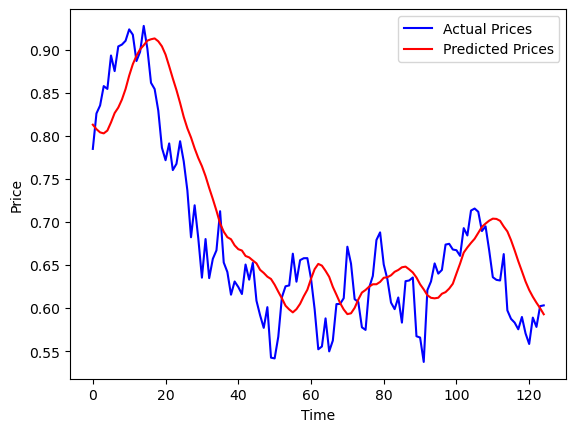

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
data = pd.read_csv('stock_prices.csv')['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(data)
data = scaler.transform(data)

# Create sequences
X, y = [], []
for i in range(len(data) - 10):
    X.append(data[i:i + 10])
    y.append(data[i + 10])

X, y = np.array(X), np.array(y)

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and compile model
model = Sequential([LSTM(50, return_sequences=True, input_shape=(10, 1)),LSTM(50), Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate model
print("Training Loss:", model.evaluate(X_train, y_train))
print("Test Loss:", model.evaluate(X_test, y_test))

# Plot actual vs predicted prices
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(model.predict(X_test), color='red', label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
